Vista previa de los datos:
   reservas  tipotarifa  tipoasignacion  tipoconvenio  tiporeserva  \
0  23662658           0               1             0            1   
1  23648290           1               1             0            1   
2  23661764           1               0             0            1   
3  23663234           0               1             0            0   
4  23658949           1               1             0            1   

   tipocontrato  idorigen  iddestino  cumplimiento  avgrating    Venta  
0             0      52.0       64.0           1.0        5.0  16510.0  
1             1      57.0       54.0           1.0        5.0  13455.0  
2             1      74.0       54.0           0.0        NaN      0.0  
3             1      52.0        3.0           0.0        NaN  28716.0  
4             0       6.0       54.0           0.0        NaN  32400.0  
Correlaciones relevantes (mayores a 0.5 o menores a -0.5):
Venta         idorigen          0.457129
iddestino     

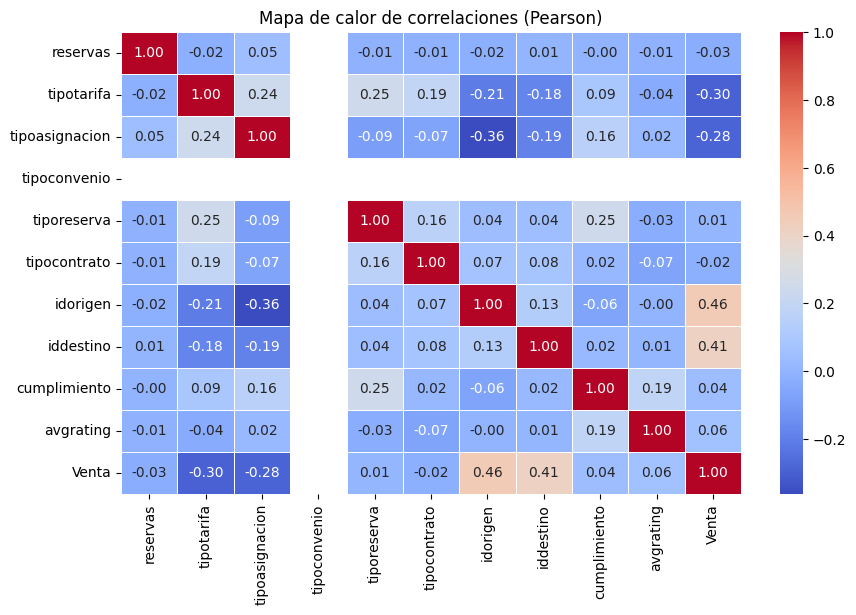

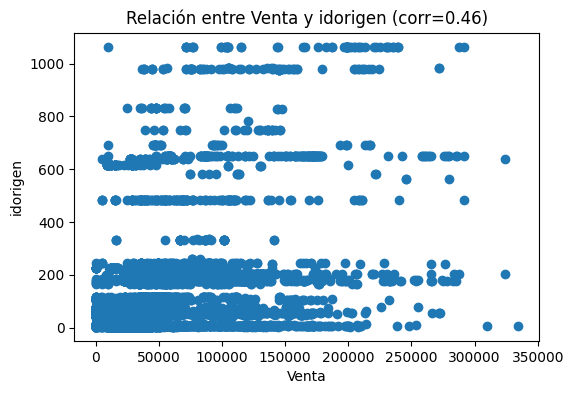

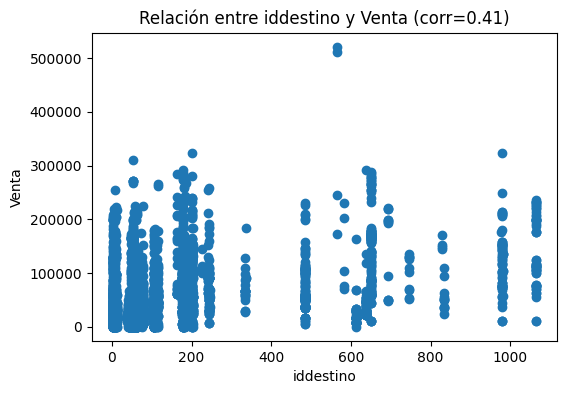

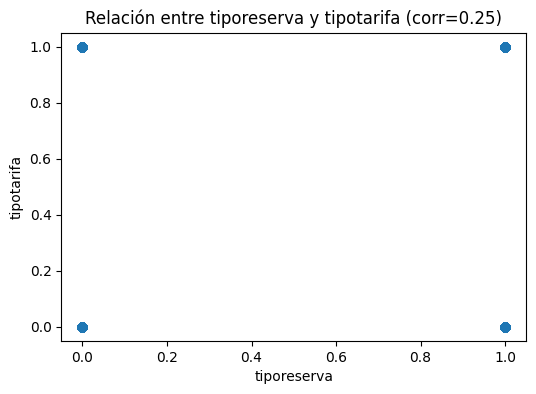

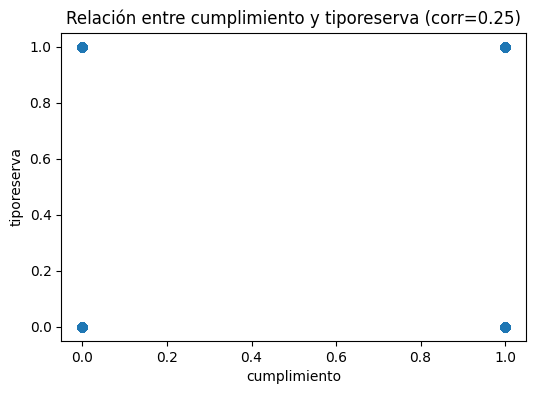

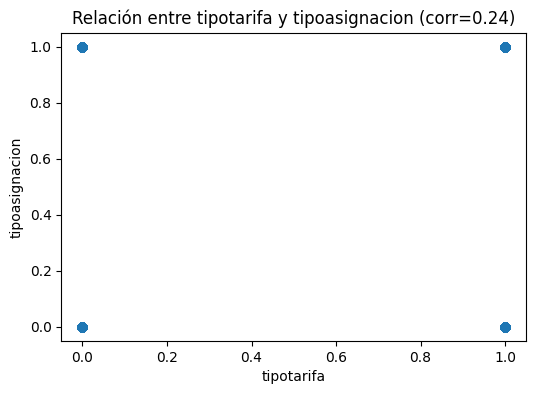

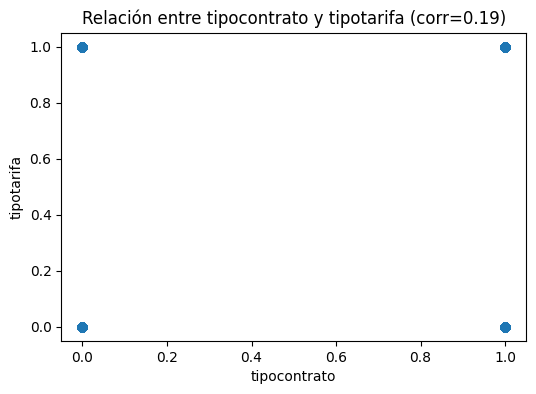

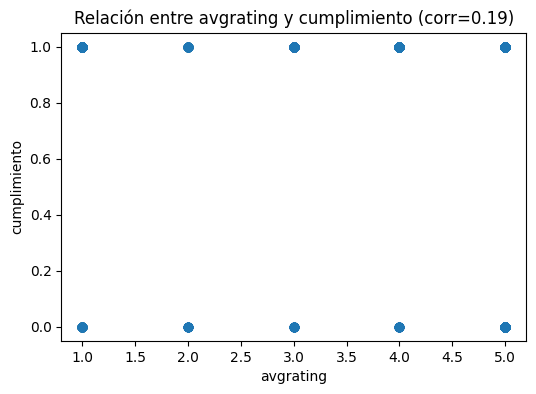

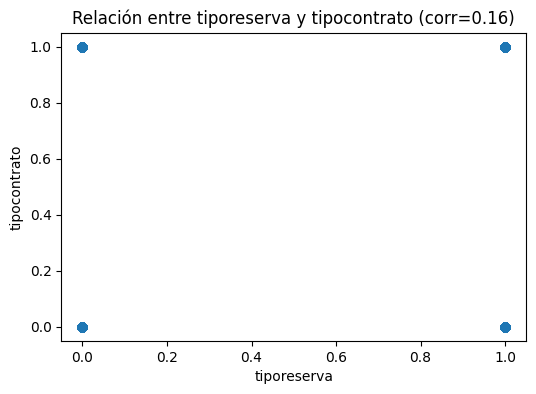

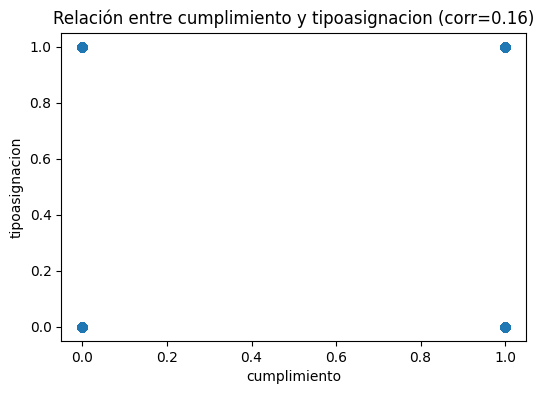

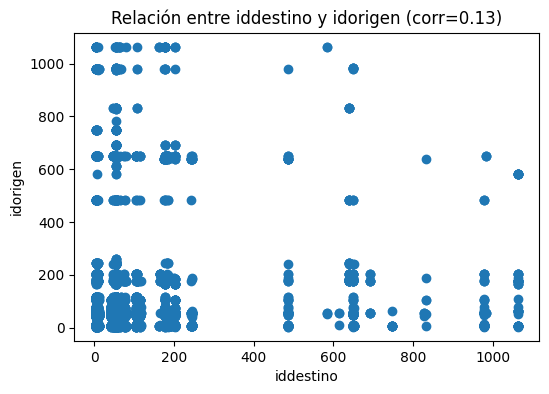

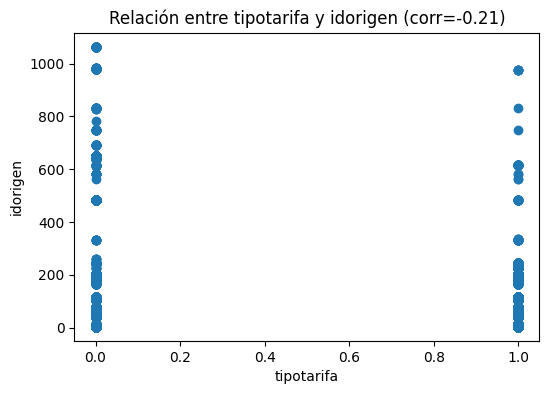

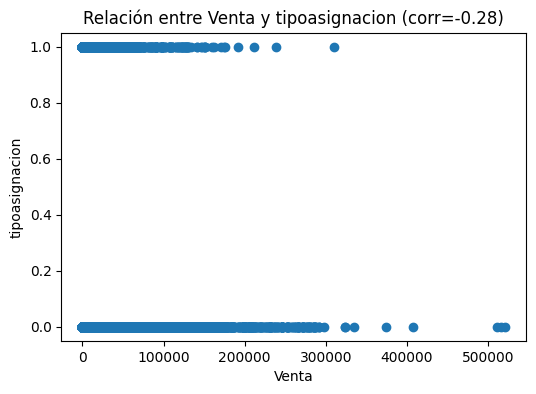

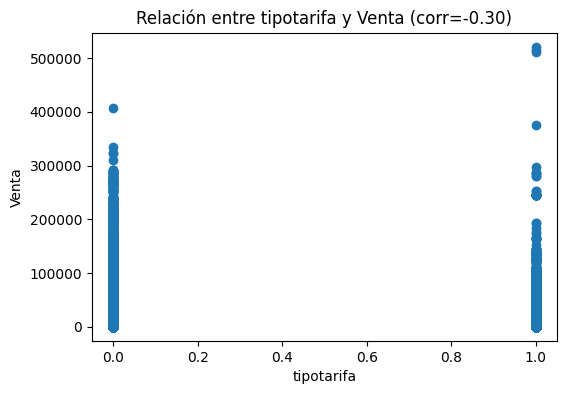

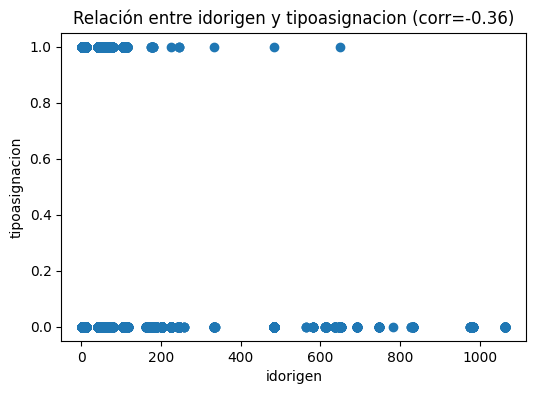

In [3]:
# ✅ Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

# ✅ Especificar la ruta del archivo CSV
ruta_archivo = "/content/Pearson Marzo 2025 C1.1.csv"  # 🔄 Reemplaza con la ruta real de tu archivo

# ✅ Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

# ✅ Mostrar las primeras filas para revisar la estructura
print("Vista previa de los datos:")
print(df.head())

# ✅ Seleccionar solo columnas numéricas para el análisis de correlación
df_numeric = df.select_dtypes(include=['number'])

# ✅ Calcular la matriz de correlación de Pearson
corr_matrix = df_numeric.corr()

# ✅ Filtrar correlaciones relevantes (mayores a 0.5 o menores a -0.5)
corr_filtered = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.2)]
corr_filtered = corr_filtered.unstack().sort_values(ascending=False).dropna()

# ✅ Eliminar duplicados (manteniendo una sola ocurrencia de cada par de variables)
corr_filtered = corr_filtered[corr_filtered < 1].drop_duplicates()

# ✅ Mostrar las correlaciones relevantes
print("Correlaciones relevantes (mayores a 0.1 o menores a -0.5):")
print(corr_filtered)

# ✅ Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones (Pearson)")
plt.show()

# ✅ Crear gráficos de dispersión solo para pares de variables con correlación fuerte
for (var1, var2), corr_value in corr_filtered.items():
    plt.figure(figsize=(6, 4))
    plt.scatter(df[var1], df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Relación entre {var1} y {var2} (corr={corr_value:.2f})')
    plt.show()


Vista previa de los datos:
   reservas  tipotarifa  tipoasignacion  tipoconvenio  tiporeserva  \
0  23662658           0               1             0            1   
1  23648290           1               1             0            1   
2  23661764           1               0             0            1   
3  23663234           0               1             0            0   
4  23658949           1               1             0            1   

   tipocontrato  idorigen  iddestino  cumplimiento  avgrating    Venta  
0             0      52.0       64.0           1.0        5.0  16510.0  
1             1      57.0       54.0           1.0        5.0  13455.0  
2             1      74.0       54.0           0.0        NaN      0.0  
3             1      52.0        3.0           0.0        NaN  28716.0  
4             0       6.0       54.0           0.0        NaN  32400.0  
Correlaciones relevantes (mayores a 0.1 o menores a -0.5):
idorigen        Venta             0.457129
iddestino   

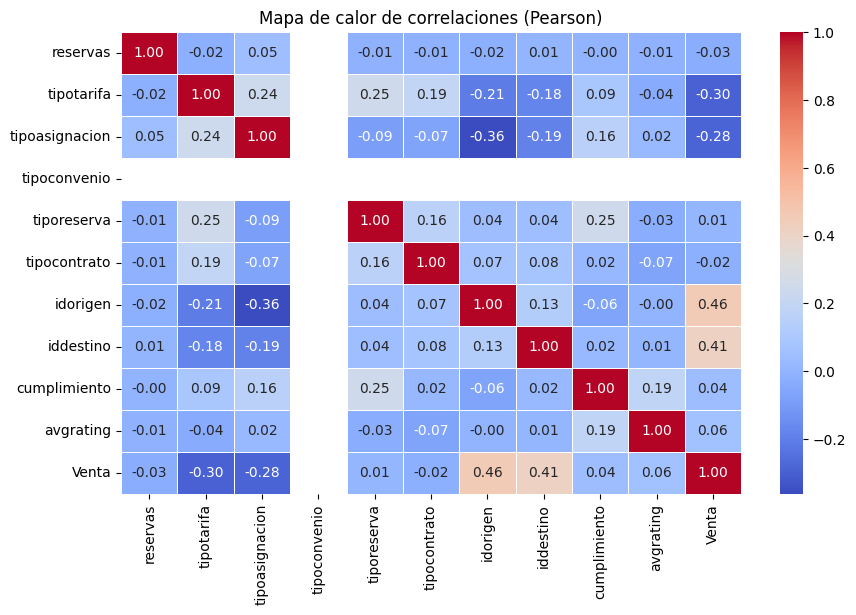


📌 Verificando multicolinealidad con el Factor de Inflación de la Varianza (VIF):

          Variable        VIF
0         reservas  63.355183
1       tipotarifa   9.251395
2   tipoasignacion   5.506214
3     tipoconvenio        NaN
4      tiporeserva  34.507737
5     tipocontrato   2.829410
6         idorigen   1.723636
7        iddestino   3.408560
8     cumplimiento  18.830013
9        avgrating  30.455838
10           Venta   3.713494


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [9]:
# ✅ Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Especificar la ruta del archivo CSV
ruta_archivo = "/content/Pearson Marzo 2025 C1.1.csv"  # 🔄 Reemplaza con la ruta real de tu archivo

# ✅ Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

# ✅ Mostrar las primeras filas para revisar la estructura
print("Vista previa de los datos:")
print(df.head())

# ✅ Seleccionar solo columnas numéricas para el análisis de correlación
df_numeric = df.select_dtypes(include=['number'])

# ✅ Calcular la matriz de correlación de Pearson
corr_matrix = df_numeric.corr()

# ✅ Filtrar correlaciones relevantes (mayores a 0.1 o menores a -0.5)
corr_filtered = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.5)]
corr_filtered = corr_filtered.unstack().sort_values(ascending=False).dropna()

# ✅ Eliminar duplicados (manteniendo una sola ocurrencia de cada par de variables)
corr_filtered = corr_filtered[corr_filtered < 1].drop_duplicates()

# ✅ Mostrar las correlaciones relevantes
print("Correlaciones relevantes (mayores a 0.1 o menores a -0.5):")
print(corr_filtered)

# ✅ Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones (Pearson)")
plt.show()

# ✅ Calcular el Factor de Inflación de la Varianza (VIF) para verificar multicolinealidad
print("\n📌 Verificando multicolinealidad con el Factor de Inflación de la Varianza (VIF):\n")

X = df_numeric.dropna()  # Eliminar valores nulos antes del cálculo
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ✅ Mostrar los valores de VIF
print(vif_data)


Vista previa de los datos:
   reservas  tipotarifa  tipoasignacion  tipoconvenio  tiporeserva  \
0  23662658           0               1             0            1   
1  23648290           1               1             0            1   
2  23661764           1               0             0            1   
3  23663234           0               1             0            0   
4  23658949           1               1             0            1   

   tipocontrato  idorigen  iddestino  cumplimiento  avgrating    Venta  
0             0      52.0       64.0           1.0        5.0  16510.0  
1             1      57.0       54.0           1.0        5.0  13455.0  
2             1      74.0       54.0           0.0        NaN      0.0  
3             1      52.0        3.0           0.0        NaN  28716.0  
4             0       6.0       54.0           0.0        NaN  32400.0  

📌 Correlaciones relevantes (mayores a 0.1 o menores a -0.5):
idorigen        Venta             0.457129
iddestino

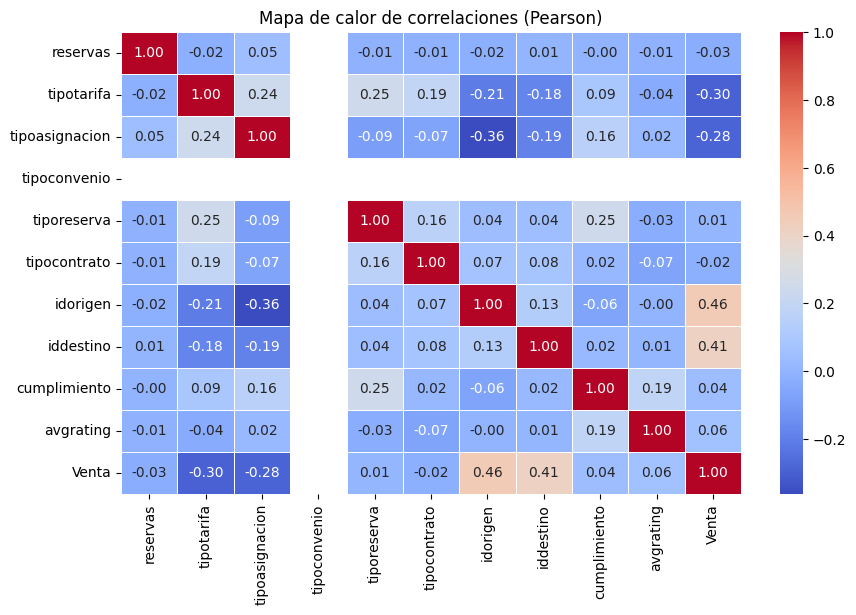


📌 Verificando multicolinealidad con el Factor de Inflación de la Varianza (VIF):

          Variable        VIF
0         reservas  63.355183
1       tipotarifa   9.251395
2   tipoasignacion   5.506214
3     tipoconvenio        NaN
4      tiporeserva  34.507737
5     tipocontrato   2.829410
6         idorigen   1.723636
7        iddestino   3.408560
8     cumplimiento  18.830013
9        avgrating  30.455838
10           Venta   3.713494

📌 Pruebas de hipótesis para la significancia de la correlación:

       Variable 1      Variable 2  Corr. Pearson  Pearson Coef        p-Valor  \
2     tiporeserva      tipotarifa       0.248082      0.248082   0.000000e+00   
4      tipotarifa  tipoasignacion       0.242185      0.242185   0.000000e+00   
5      tipotarifa    tipocontrato       0.194157      0.194157   0.000000e+00   
7     tiporeserva    tipocontrato       0.161111      0.161111  2.715351e-294   
0        idorigen           Venta       0.457129           NaN            NaN   
1    

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [11]:
# ✅ Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Especificar la ruta del archivo CSV
ruta_archivo = "/content/Pearson Marzo 2025 C1.1.csv"  # 🔄 Reemplaza con la ruta real de tu archivo

# ✅ Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

# ✅ Mostrar las primeras filas para revisar la estructura
print("Vista previa de los datos:")
print(df.head())

# ✅ Seleccionar solo columnas numéricas para el análisis de correlación
df_numeric = df.select_dtypes(include=['number'])

# ✅ Calcular la matriz de correlación de Pearson
corr_matrix = df_numeric.corr()

# ✅ Filtrar correlaciones relevantes (mayores a 0.1 o menores a -0.5)
corr_filtered = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.5)]
corr_filtered = corr_filtered.unstack().sort_values(ascending=False).dropna()

# ✅ Eliminar duplicados (manteniendo una sola ocurrencia de cada par de variables)
corr_filtered = corr_filtered[corr_filtered < 1].drop_duplicates()

# ✅ Mostrar las correlaciones relevantes
print("\n📌 Correlaciones relevantes (mayores a 0.1 o menores a -0.5):")
print(corr_filtered)

# ✅ Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones (Pearson)")
plt.show()

# ✅ Calcular el Factor de Inflación de la Varianza (VIF) para verificar multicolinealidad
print("\n📌 Verificando multicolinealidad con el Factor de Inflación de la Varianza (VIF):\n")

X = df_numeric.dropna()  # Eliminar valores nulos antes del cálculo
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ✅ Mostrar los valores de VIF
print(vif_data)

# ✅ Realizar pruebas de hipótesis (Test de Pearson) para evaluar la significancia de la correlación
print("\n📌 Pruebas de hipótesis para la significancia de la correlación:\n")

significance_results = []
alpha = 0.05  # Nivel de significancia

for (var1, var2), corr_value in corr_filtered.items():
    pearson_corr, p_value = pearsonr(df_numeric[var1], df_numeric[var2])

    # Determinar si la correlación es estadísticamente significativa
    significant = "Sí" if p_value < alpha else "No"

    # Guardar resultados en una lista
    significance_results.append((var1, var2, corr_value, pearson_corr, p_value, significant))

# ✅ Convertir resultados en un DataFrame ordenado
df_significance = pd.DataFrame(significance_results, columns=["Variable 1", "Variable 2", "Corr. Pearson", "Pearson Coef", "p-Valor", "Significativa?"])
df_significance = df_significance.sort_values(by="p-Valor")

# ✅ Mostrar la tabla de resultados de significancia
print(df_significance)




📌 Correlaciones fuertes encontradas:
idorigen        Venta             0.457129
Venta           iddestino         0.414389
tipoasignacion  idorigen          0.361066
Venta           tipotarifa        0.296636
tipoasignacion  Venta             0.283240
tiporeserva     tipotarifa        0.248082
                cumplimiento      0.246835
tipotarifa      tipoasignacion    0.242185
idorigen        tipotarifa        0.207869
tipotarifa      tipocontrato      0.194157
avgrating       cumplimiento      0.186370
iddestino       tipoasignacion    0.185652
tipotarifa      iddestino         0.176414
tiporeserva     tipocontrato      0.161111
cumplimiento    tipoasignacion    0.156606
idorigen        iddestino         0.128123
tipoasignacion  tiporeserva       0.089640
tipotarifa      cumplimiento      0.088847
iddestino       tipocontrato      0.076978
idorigen        tipocontrato      0.069845
avgrating       tipocontrato      0.066371
tipocontrato    tipoasignacion    0.065224
cumplimiento    

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



📌 Factores de Inflación de la Varianza (VIF):
         Variable        VIF
0        reservas  47.922079
1      tipotarifa   6.598732
2  tipoasignacion   3.591140
3    tipoconvenio        NaN
4     tiporeserva  47.951178
5    tipocontrato   3.349617
6        idorigen   1.729673
7       iddestino   2.051923
8    cumplimiento  14.020769
9           Venta   2.741640

📊 Modelo: Regresión Lineal
🔹 MSE: 0.0000
🔹 R²: 1.0000


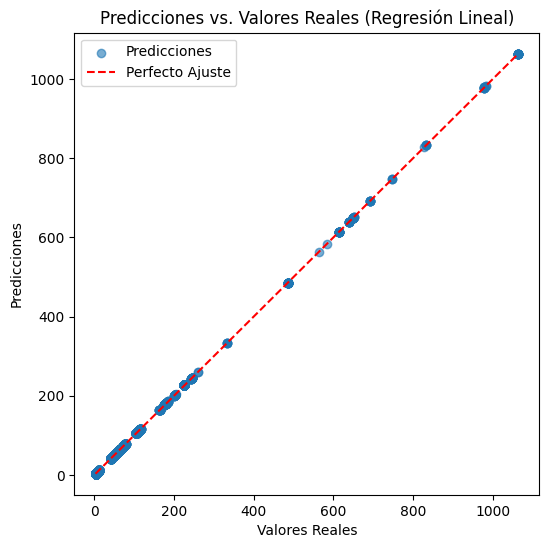


📊 Modelo: Lasso
🔹 MSE: 0.0000
🔹 R²: 1.0000


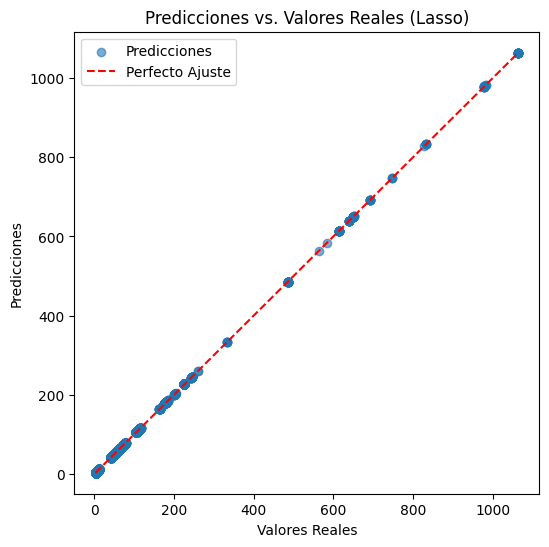

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.41087e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



📊 Modelo: Ridge
🔹 MSE: 0.0000
🔹 R²: 1.0000


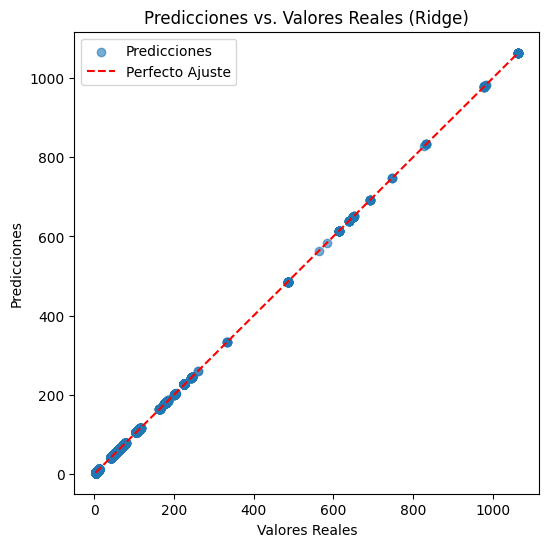

In [26]:
# ✅ Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Especificar la ruta del archivo CSV
ruta_archivo = "/content/Pearson Marzo 2025 C1.1.csv"  # 🔄 Reemplaza con la ruta real

# ✅ Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

# ✅ Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number']).copy()

# ✅ Calcular la matriz de correlación de Pearson
corr_matrix = df_numeric.corr()

# ✅ Filtrar correlaciones fuertes (|corr| > 0.5)
corr_filtered = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_filtered = corr_filtered[corr_filtered < 1].drop_duplicates()

# ✅ Mostrar las correlaciones fuertes
print("\n📌 Correlaciones fuertes encontradas:")
print(corr_filtered)

# ✅ Eliminar una de las variables altamente correlacionadas
# Ejemplo: Si 'reservas' y 'tiporeserva' están muy correlacionadas, eliminamos 'reservas'
# Filtramos si la correlación es mayor a 0.8 para tomar acción
highly_correlated = corr_filtered[corr_filtered > 0.8].index
variables_to_drop = [var[1] for var in highly_correlated]  # Tomamos la segunda variable del par
variables_to_drop = list(set(variables_to_drop))  # Evitamos duplicados

# Eliminamos las variables redundantes
X = df_numeric.drop(columns=variables_to_drop)  # Eliminar las variables redundantes

# ✅ Seleccionamos la variable objetivo
target_variable = corr_filtered.idxmax()[0]  # Tomar la variable más correlacionada
print(f"\n📌 Variable objetivo seleccionada: {target_variable}")

# ✅ Definir X (variables predictoras) y y (variable objetivo)
y = df_numeric[target_variable]

# ✅ Manejar valores NaN en X
X = X.dropna(axis=1, thresh=int(0.7 * len(X)))  # Eliminar columnas con más del 30% NaN
X = X.fillna(X.mean())  # Rellenar NaN con la media
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())  # Reemplazar infinitos

# ✅ Manejar valores NaN en y
y = y.fillna(y.mean())

# ✅ Calcular el Factor de Inflación de la Varianza (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n📌 Factores de Inflación de la Varianza (VIF):")
print(vif_data)

# ✅ Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Modelos de regresión
models = {
    "Regresión Lineal": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1)
}

# ✅ Entrenar y evaluar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 Modelo: {name}")
    print(f"🔹 MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"🔹 R²: {r2_score(y_test, y_pred):.4f}")

    # ✅ Gráfico de predicciones vs valores reales
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], "--r", label="Perfecto Ajuste")
    plt.xlabel("Valores Reales")
    plt.ylabel("Predicciones")
    plt.legend()
    plt.title(f"Predicciones vs. Valores Reales ({name})")
    plt.show()



In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Selección de variables relevantes según las correlaciones
X = df[['idorigen', 'iddestino', 'tipotarifa','tipoasignacion','tiporeserva']]  # Variables predictoras
y = df['Venta']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')


MSE: 200447917.90780288
R²: 0.1843362297982728


In [23]:
# ✅ Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ✅ Especificar la ruta del archivo CSV
ruta_archivo = "/content/Pearson Marzo 2025 C1.1.csv"  # 🔄 Reemplaza con la ruta real de tu archivo

# ✅ Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

# ✅ Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# ✅ Calcular la matriz de correlación de Pearson
corr_matrix = df_numeric.corr()

# ✅ Filtrar las correlaciones fuertes (> 0.1 o < -0.5)
corr_matrix = df_numeric.corr()
corr_filtered = corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.5)].unstack().sort_values(ascending=False).dropna()
corr_filtered = corr_filtered[corr_filtered < 1].drop_duplicates()

# ✅ Mostrar las correlaciones fuertes para decidir qué variables eliminar
print("Correlaciones fuertes identificadas:")
print(corr_filtered)

# ✅ Eliminar una de las variables altamente correlacionadas (reservas y tiporeserva en este caso)
# Por ejemplo, eliminamos "reservas" si están muy correlacionadas con "tiporeserva"
X = df_numeric.drop(columns=['reservas'])  # Eliminar 'reservas' o 'tiporeserva' según corresponda

# ✅ Definir la variable objetivo (Y)
y = df_numeric[target_variable]

# ✅ Eliminar columnas con más del 30% de valores NaN en X
X = X.dropna(axis=1, thresh=int(0.7 * len(X)))

# ✅ Rellenar valores NaN restantes con la media de cada columna
X = X.fillna(X.mean())

# ✅ Reemplazar valores infinitos por el máximo finito de cada columna
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())

# ✅ Manejar valores NaN en 'y'
y = y.fillna(y.mean())  # Reemplazar NaN con la media de la variable objetivo

# ✅ Dividir los datos en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Entrenar y evaluar el modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

# ✅ Crear y entrenar el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# ✅ Hacer predicciones
y_pred = model_rf.predict(X_test)

# ✅ Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Imprimir los resultados
print(f"\n📊 Modelo: Random Forest sin variables redundantes")
print(f"🔹 MSE: {mse:.4f}")
print(f"🔹 R²: {r2:.4f}")


Correlaciones fuertes identificadas:
idorigen        Venta             0.457129
iddestino       Venta             0.414389
tiporeserva     tipotarifa        0.248082
cumplimiento    tiporeserva       0.246835
tipotarifa      tipoasignacion    0.242185
                tipocontrato      0.194157
cumplimiento    avgrating         0.186370
tiporeserva     tipocontrato      0.161111
tipoasignacion  cumplimiento      0.156606
iddestino       idorigen          0.128123
dtype: float64

📊 Modelo: Random Forest sin variables redundantes
🔹 MSE: 0.2150
🔹 R²: 1.0000
